<a href="https://colab.research.google.com/github/hadni17/skripsi/blob/main/MODEL_w_CFS_(270323).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset=pd.read_csv('/content/drive/MyDrive/data_olah.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 94 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_MAHASISWA                2477 non-null   int64  
 1   prodiID                     2477 non-null   int64  
 2   mhsAngk                     2477 non-null   int64  
 3   mhskdprop                   2477 non-null   int64  
 4   mhskdkab                    2477 non-null   int64  
 5   mhskdpos                    2477 non-null   int64  
 6   tempat_lahir                2477 non-null   object 
 7   mhskdtmplhrprop             2477 non-null   int64  
 8   mhskdtmplhrkab              2477 non-null   int64  
 9   mhstgllhr                   2477 non-null   object 
 10  mhsjk                       2477 non-null   int64  
 11  mhsstatrmh                  2477 non-null   int64  
 12  mhswni                      2477 non-null   int64  
 13  mhsjs                       2477 

In [5]:
dataset.columns

Index(['ID_MAHASISWA', 'prodiID', 'mhsAngk', 'mhskdprop', 'mhskdkab',
       'mhskdpos', 'tempat_lahir', 'mhskdtmplhrprop', 'mhskdtmplhrkab',
       'mhstgllhr', 'mhsjk', 'mhsstatrmh', 'mhswni', 'mhsjs', 'mhsstatus',
       'mhstextnoind', 'mhskeg', 'mhssifatkeg', 'mhsptslain', 'mhsagama',
       'mhskawin', 'mhshoby', 'mhsgoldarah', 'mhspdkayah', 'mhspdkibu',
       'mhspekayah', 'mhspekibu', 'mhsjalurmsk', 'mhshubdgot', 'mhssmtaasal',
       'mhssmtath', 'mhssmtakls', 'mhssmtanoin', 'mhssttbth', 'mhssttbmp',
       'mhssttbnilai', 'mhsebtamp', 'mhsebtanilai', 'mhsthlhrayah',
       'mhsthlhribu', 'mhsbeasiswa', 'mhssmtajur', 'mhssmbbiaya',
       'mhswaliprop', 'mhswalikab', 'mhsprestasi', 'mhspemberibeasiswa',
       'thlulus', 'pt_asal', 'smt_reg', 'total_kredit_capai', 'prodi', 'reg',
       'stat_jenjang', 'cek_reg', 'mhs_smta_prop', 'prodi_asal', 'prodi_s2',
       'pt_asal_s2', 'nisn', 'npsn', 'penghasilan_ibu',
       'penghasilan_ibu_range', 'penghasilan_ayah', 'penghasilan_a

In [6]:
dataset['STATUS DROP OUT'] = dataset['STATUS DROP OUT'].replace(to_replace={'TIDAK DROP OUT':0,'DROP OUT':1})
dataset.rename(columns={'STATUS DROP OUT':'class'},inplace=True)
dataset.replace('-', np.nan)
dataset.drop('ID_MAHASISWA',axis=1,inplace=True)
dataset[['kegiatan_mahasiswa', 'penyakit_diderita']]

,kegiatan_mahasiswa,penyakit_diderita
0,NaN,NaN
1,KSR PMI Unit UNS,maag
2,KOPMA UNS & lembaga keanggotaan,NaN
3,NaN,NaN
4,Kine Klub FISIP UNS,NaN
...,...,...
2472,aai,asam lambung
2473,NaN,NaN
2474,NaN,NaN
2475,NaN,NaN


In [7]:
dataset['kegiatan_mahasiswa'] = dataset['kegiatan_mahasiswa'].replace([np.nan,'Tidak ada','TIDAK ADA','Tidak Ada'], 'tidak ada')
dataset['penyakit_diderita'] = dataset['penyakit_diderita'].replace([np.nan,'Tidak ada','TIDAK ADA','Tidak Ada'], 'tidak ada')
dataset[['kegiatan_mahasiswa', 'penyakit_diderita']]

,kegiatan_mahasiswa,penyakit_diderita
0,tidak ada,tidak ada
1,KSR PMI Unit UNS,maag
2,KOPMA UNS & lembaga keanggotaan,tidak ada
3,tidak ada,tidak ada
4,Kine Klub FISIP UNS,tidak ada
...,...,...
2472,aai,asam lambung
2473,tidak ada,tidak ada
2474,tidak ada,tidak ada
2475,tidak ada,tidak ada


In [8]:
dataset.drop(['prodiID',
'mhskdpos',
'mhsjs',
'mhsstatus',
'mhskeg',
'mhssifatkeg',
'mhsptslain',
'mhssttbmp',
'mhssttbnilai',
'thlulus',
'pt_asal',
'smt_reg',
'prodi',
'stat_jenjang',
'cek_reg',
'prodi_s2',
'pt_asal_s2',
'nisn',
'npsn',
'kebangsaan',
'ukuran_kaos',
'Tanggal_Lahir',
'status_ortu_ayah',
'status_ortu_ibu',
'Tanggal_Lulus',
'penghasilan_sampingan_ayah',
'penghasilan_sampingan_ibu',
'reg',
'Jenis_Kelamin',
'status_tinggal',
'prodi_asal',
'jumlah_tanggungan',
'jenjang',
'Angkatan',
'mhsAngk',
'IPS5',
'IPS6',
'total_kredit_capai_smt6 ',
'mhssmtanoin',
'mhssmtakls',
'mhssmtath',
'mhswaliprop',
'mhswalikab',
'tempat_lahir',
'mhskdtmplhrkab',
'mhstgllhr',
'mhskdtmplhrprop',
'penghasilan_ibu','penghasilan_ayah'
], axis=1, inplace=True)

In [9]:
dataset.head()
dataset.isnull().sum()
dataset = dataset.dropna(axis=0)

In [10]:
dataset.isnull().sum()

mhskdprop                   0
mhskdkab                    0
mhsjk                       0
mhsstatrmh                  0
mhswni                      0
mhstextnoind                0
mhsagama                    0
mhskawin                    0
mhshoby                     0
mhsgoldarah                 0
mhspdkayah                  0
mhspdkibu                   0
mhspekayah                  0
mhspekibu                   0
mhsjalurmsk                 0
mhshubdgot                  0
mhssmtaasal                 0
mhssttbth                   0
mhsebtamp                   0
mhsebtanilai                0
mhsthlhrayah                0
mhsthlhribu                 0
mhsbeasiswa                 0
mhssmtajur                  0
mhssmbbiaya                 0
mhsprestasi                 0
mhspemberibeasiswa          0
total_kredit_capai          0
mhs_smta_prop               0
penghasilan_ibu_range       0
penghasilan_ayah_range      0
mhsgajiortu                 0
penyakit_diderita           0
kegiatan_m

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2476
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mhskdprop                 2467 non-null   int64  
 1   mhskdkab                  2467 non-null   int64  
 2   mhsjk                     2467 non-null   int64  
 3   mhsstatrmh                2467 non-null   int64  
 4   mhswni                    2467 non-null   int64  
 5   mhstextnoind              2467 non-null   int64  
 6   mhsagama                  2467 non-null   int64  
 7   mhskawin                  2467 non-null   int64  
 8   mhshoby                   2467 non-null   int64  
 9   mhsgoldarah               2467 non-null   int64  
 10  mhspdkayah                2467 non-null   int64  
 11  mhspdkibu                 2467 non-null   int64  
 12  mhspekayah                2467 non-null   int64  
 13  mhspekibu                 2467 non-null   int64  
 14  mhsjalur

In [12]:
dataset.drop(['total_kredit_capai'], axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataset['penyakit_diderita']=lb.fit_transform(dataset['penyakit_diderita'])
dataset['kegiatan_mahasiswa']=lb.fit_transform(dataset['kegiatan_mahasiswa'])
dataset['nama_prodi_asli']=lb.fit_transform(dataset['nama_prodi_asli'])
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2476
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mhskdprop                 2467 non-null   int64  
 1   mhskdkab                  2467 non-null   int64  
 2   mhsjk                     2467 non-null   int64  
 3   mhsstatrmh                2467 non-null   int64  
 4   mhswni                    2467 non-null   int64  
 5   mhstextnoind              2467 non-null   int64  
 6   mhsagama                  2467 non-null   int64  
 7   mhskawin                  2467 non-null   int64  
 8   mhshoby                   2467 non-null   int64  
 9   mhsgoldarah               2467 non-null   int64  
 10  mhspdkayah                2467 non-null   int64  
 11  mhspdkibu                 2467 non-null   int64  
 12  mhspekayah                2467 non-null   int64  
 13  mhspekibu                 2467 non-null   int64  
 14  mhsjalur

In [14]:
dataset.head(100)

,mhskdprop,mhskdkab,mhsjk,mhsstatrmh,mhswni,mhstextnoind,mhsagama,mhskawin,mhshoby,mhsgoldarah,...,kode,fakult,nama_prodi_asli,IPS1,IPS2,IPS3,IPS4,total_kredit_capai_smt4,ipk,class
0,32,32036,1,1,1,2,1,1,8,4,...,60807,6,1,3.10,3.24,2.91,3.55,83.0,3.19,0
1,33,33724,0,5,1,3,1,2,3,3,...,87407,8,42,3.08,3.57,3.00,3.04,92.0,3.20,0
2,33,33113,0,1,1,3,1,1,2,3,...,10907,1,32,2.95,3.14,3.19,3.46,86.0,3.23,0
3,33,33724,1,1,1,1,1,1,3,1,...,20307,2,79,2.45,0.71,3.00,3.34,51.0,3.20,0
4,33,33191,0,1,1,2,1,1,6,2,...,20207,2,23,3.46,3.41,3.29,3.69,88.0,3.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,33,33225,0,1,1,3,1,1,1,3,...,70107,7,85,3.40,3.50,2.96,3.34,86.0,3.25,0
97,33,33016,1,1,1,1,1,1,1,2,...,84607,8,52,2.67,2.80,2.52,2.50,70.0,2.78,0
98,33,33121,1,1,1,3,1,1,1,2,...,85607,8,53,3.22,3.58,2.91,3.72,87.0,3.45,0
100,33,33136,0,1,1,3,1,1,8,4,...,87107,8,50,3.35,3.62,3.74,3.63,93.0,3.56,0


In [15]:
import numpy as np
from scipy.stats import entropy

features = dataset.columns.tolist()
features.remove('class')

#predictor
X = dataset[features]
# target
Y = dataset['class']

# Calculate correlation
corr_matrix = X.corrwith(Y)

# Determine merit
merit = abs(corr_matrix)
print(merit)

# sorted_features = np.sort(merit,axis=None)[::-1]
# print(sorted_features)

selected_features = X.columns[merit > 0.1]
print(selected_features)

# Subset data dengan fitur-fitur yang terpilih
dataset[selected_features]

mhskdprop                   0.057696
mhskdkab                    0.057432
mhsjk                       0.140233
mhsstatrmh                  0.010363
mhswni                      0.018320
mhstextnoind                0.007129
mhsagama                    0.035399
mhskawin                    0.006426
mhshoby                     0.059864
mhsgoldarah                 0.013262
mhspdkayah                  0.059379
mhspdkibu                   0.046961
mhspekayah                  0.042252
mhspekibu                   0.006421
mhsjalurmsk                 0.044870
mhshubdgot                  0.014280
mhssmtaasal                 0.049480
mhssttbth                   0.008134
mhsebtamp                   0.008032
mhsebtanilai                0.062541
mhsthlhrayah                0.013386
mhsthlhribu                 0.015794
mhsbeasiswa                 0.019207
mhssmtajur                  0.055652
mhssmbbiaya                 0.009381
mhsprestasi                 0.043774
mhspemberibeasiswa          0.012380
m

,mhsjk,IPS1,IPS2,IPS3,IPS4,total_kredit_capai_smt4,ipk
0,1,3.10,3.24,2.91,3.55,83.0,3.19
1,0,3.08,3.57,3.00,3.04,92.0,3.20
2,0,2.95,3.14,3.19,3.46,86.0,3.23
3,1,2.45,0.71,3.00,3.34,51.0,3.20
4,0,3.46,3.41,3.29,3.69,88.0,3.49
...,...,...,...,...,...,...,...
2472,0,3.10,3.21,3.27,3.14,86.0,2.56
2473,1,2.74,1.59,1.50,0.00,35.0,1.70
2474,1,2.70,3.40,3.42,3.75,88.0,3.51
2475,1,3.13,3.17,2.91,3.48,87.0,3.26


**SVM DENGAN FS**

In [16]:
# # find best value of SVM's hyperparameter

# from sklearn.model_selection import GridSearchCV
# from sklearn import svm

# # predictors
# X = dataset[selected_features].to_numpy()
# # target
# Y = dataset['class'].to_numpy()

# # define the range of hyperparameters to search over
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [0.1, 1, 10, 100],
#     'kernel': ['rbf','linear']
# }

# # create a SVM classifier object
# svm_clf = svm.SVC()

# # perform grid search with cross-validation
# grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
# grid_search.fit(X, Y)

# # print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

Time: 2.6739 s



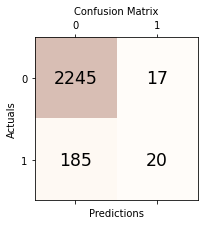

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2262
           1       0.54      0.10      0.17       205

    accuracy                           0.92      2467
   macro avg       0.73      0.55      0.56      2467
weighted avg       0.89      0.92      0.89      2467


Accuracy: 91.81%
Precision: 54.05%
Recall: 9.76%


In [17]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import svm
import time

# predictors
X = dataset[selected_features].to_numpy()
# target
Y = dataset['class'].to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
y_pred = cross_val_predict(svc, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

**NAIVE BAYES DGN FS**

In [18]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.naive_bayes import GaussianNB

# # predictors
# X = dataset[selected_features].to_numpy()
# # target
# Y = dataset['class'].to_numpy()

# # define the parameter grid
# param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# # create a GaussianNB classifier
# gnb = GaussianNB(var_smoothing= 1e-05)

# # create a GridSearchCV object
# grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=10)

# # fit the GridSearchCV object to the data
# grid_search.fit(X, Y)

# # print the best parameters and score
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)


Time: 0.0220 s



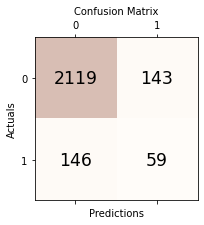

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2262
           1       0.29      0.29      0.29       205

    accuracy                           0.88      2467
   macro avg       0.61      0.61      0.61      2467
weighted avg       0.88      0.88      0.88      2467


Accuracy: 88.29%
Precision: 29.21%
Recall: 28.78%


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import time

# predictors
X = dataset[selected_features].to_numpy()
# target
Y = dataset['class'].to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run Naive Bayes with 10-fold cross validation
gnb = GaussianNB(var_smoothing= 1e-09)
y_pred = cross_val_predict(gnb, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

In [20]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# # predictors
# X = dataset[selected_features].to_numpy()
# # target
# Y = dataset['class'].to_numpy()

# # create decision tree classifier
# dt = DecisionTreeClassifier()

# # set up parameter grid to search over
# param_grid = {
#     'max_depth': [2, 4, 6, 8, 10],
#     'min_samples_split': [2, 4, 8, 16],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': [None, 'sqrt', 'log2']
# }

# # perform grid search using cross-validation
# cv = GridSearchCV(dt, param_grid, cv=10)
# cv.fit(X, Y)

# # print best hyperparameters
# print(cv.best_params_)
# print("Best score: ", cv.best_score_)

Time: 0.0159 s



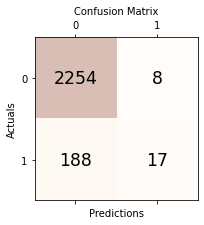

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2262
           1       0.68      0.08      0.15       205

    accuracy                           0.92      2467
   macro avg       0.80      0.54      0.55      2467
weighted avg       0.90      0.92      0.89      2467


Accuracy: 92.06%
Precision: 68.00%
Recall: 8.29%


In [21]:
#DECISION TREE

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import tree
import time

# predictors
X = dataset[selected_features].to_numpy()
# target
Y = dataset['class'].to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run DT with 10-fold cross validation
dt = tree.DecisionTreeClassifier(criterion="entropy",max_depth= 2, max_features= "sqrt", min_samples_leaf= 2,min_samples_split= 8)
y_pred = cross_val_predict(dt, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

**svm tanpa FS**

Time: 5.6507 s



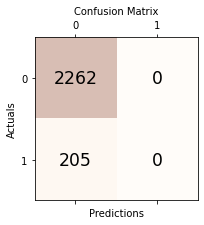

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2262
           1       0.00      0.00      0.00       205

    accuracy                           0.92      2467
   macro avg       0.46      0.50      0.48      2467
weighted avg       0.84      0.92      0.88      2467


Accuracy: 91.69%
Precision: 0.00%
Recall: 0.00%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

In [22]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import svm
import time

# predictors
X = dataset[features].to_numpy()
# target
Y = dataset['class'].to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run DT with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
y_pred = cross_val_predict(svc, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

**NAIVE BAYES tanpa FS**

Time: 0.0400 s



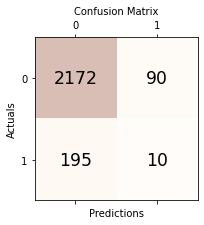

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2262
           1       0.10      0.05      0.07       205

    accuracy                           0.88      2467
   macro avg       0.51      0.50      0.50      2467
weighted avg       0.85      0.88      0.87      2467


Accuracy: 88.45%
Precision: 10.00%
Recall: 4.88%


In [23]:
# predictors
X = dataset[features].to_numpy()
# target
Y = dataset['class'].to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run Naive Bayes with 10-fold cross validation
gnb = GaussianNB(var_smoothing= 1e-09)
y_pred = cross_val_predict(gnb, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

**Decision tree tanpa FS**

Time: 0.0303 s



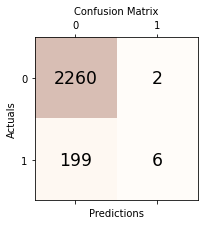

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2262
           1       0.75      0.03      0.06       205

    accuracy                           0.92      2467
   macro avg       0.83      0.51      0.51      2467
weighted avg       0.91      0.92      0.88      2467


Accuracy: 91.85%
Precision: 75.00%
Recall: 2.93%


In [24]:
from sklearn import tree

# predictors
X = dataset[features].to_numpy()
# target
Y = dataset['class'].to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run DT with 10-fold cross validation
dt = tree.DecisionTreeClassifier(criterion="entropy",max_depth= 2, max_features= "sqrt", min_samples_leaf= 2,min_samples_split= 8)
y_pred = cross_val_predict(dt, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

**USING SMOTE**

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
X = dataset.drop('class', axis=1)
y = dataset['class']

# Inisialisasi objek SMOTE
sm = SMOTE(random_state=42)

# Fit dan transform dataset dengan SMOTE
X_res, y_res = sm.fit_resample(X, y)

In [27]:
X_res

,mhskdprop,mhskdkab,mhsjk,mhsstatrmh,mhswni,mhstextnoind,mhsagama,mhskawin,mhshoby,mhsgoldarah,...,kegiatan_mahasiswa,kode,fakult,nama_prodi_asli,IPS1,IPS2,IPS3,IPS4,total_kredit_capai_smt4,ipk
0,32,32036,1,1,1,2,1,1,8,4,...,813,60807,6,1,3.100000,3.240000,2.910000,3.550000,83.000000,3.190000
1,33,33724,0,5,1,3,1,2,3,3,...,445,87407,8,42,3.080000,3.570000,3.000000,3.040000,92.000000,3.200000
2,33,33113,0,1,1,3,1,1,2,3,...,425,10907,1,32,2.950000,3.140000,3.190000,3.460000,86.000000,3.230000
3,33,33724,1,1,1,1,1,1,3,1,...,813,20307,2,79,2.450000,0.710000,3.000000,3.340000,51.000000,3.200000
4,33,33191,0,1,1,2,1,1,6,2,...,484,20207,2,23,3.460000,3.410000,3.290000,3.690000,88.000000,3.490000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,33,33114,0,1,1,3,1,1,3,3,...,119,60807,6,1,3.340062,3.297980,3.334511,3.487286,90.000000,3.417286
4520,33,33113,0,1,1,3,1,1,1,3,...,722,84267,8,38,3.415379,3.443362,3.111596,3.532354,91.949583,3.377479
4521,33,33134,0,1,1,2,1,1,1,2,...,32,40296,4,6,3.495731,3.569731,3.595750,3.515615,89.671153,3.523288
4522,34,34025,1,1,1,3,1,1,1,2,...,556,74052,7,32,2.363741,2.837623,2.532617,2.805714,68.728466,3.040338


In [28]:
# Periksa hasil dari SMOTE
print('Jumlah sampel asli:', len(dataset))
print('Jumlah sampel setelah SMOTE:', len(X_res))
print('Jumlah sampel target = 0:', sum(y_res == 0))
print('Jumlah sampel target = 1:', sum(y_res == 1))

Jumlah sampel asli: 2467
Jumlah sampel setelah SMOTE: 4524
Jumlah sampel target = 0: 2262
Jumlah sampel target = 1: 2262


In [29]:
# find best value of SVM's hyperparameter

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# predictors
X = X_res.to_numpy()
# target
Y = y_res.to_numpy()

# define the range of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

# create a SVM classifier object
svm_clf = svm.SVC()

# perform grid search with cross-validation
grid_search = GridSearchCV(svm_clf, param_grid, cv=10)
grid_search.fit(X, Y)

# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.5203320049229326


Time: 15.3664 s



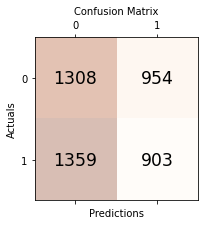

              precision    recall  f1-score   support

           0       0.49      0.58      0.53      2262
           1       0.49      0.40      0.44      2262

    accuracy                           0.49      4524
   macro avg       0.49      0.49      0.48      4524
weighted avg       0.49      0.49      0.48      4524


Accuracy: 48.87%
Precision: 48.63%
Recall: 39.92%


In [30]:
# predictors
X = X_res.to_numpy()
# target
Y = y_res.to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
y_pred = cross_val_predict(svc, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()


# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# predictors
X = X_res.to_numpy()
# target
Y = y_res.to_numpy()

# define the parameter grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# create a GaussianNB classifier
gnb = GaussianNB()

# create a GridSearchCV object
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=10)

# fit the GridSearchCV object to the data
grid_search.fit(X, Y)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'var_smoothing': 1e-09}
Best score:  0.5053087577409208


Time: 0.0597 s



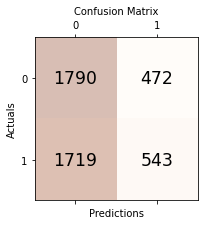

              precision    recall  f1-score   support

           0       0.51      0.79      0.62      2262
           1       0.53      0.24      0.33      2262

    accuracy                           0.52      4524
   macro avg       0.52      0.52      0.48      4524
weighted avg       0.52      0.52      0.48      4524


Accuracy: 51.57%
Precision: 53.50%
Recall: 24.01%


In [32]:
# predictors
X = X_res.to_numpy()
# target
Y = y_res.to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run Naive Bayes with 10-fold cross validation
gnb = GaussianNB(var_smoothing=1e-09)
y_pred = cross_val_predict(gnb, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# predictors
X = X_res.to_numpy()
# target
Y = y_res.to_numpy()

# create decision tree classifier
dt = DecisionTreeClassifier()

# set up parameter grid to search over
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# perform grid search using cross-validation
cv = GridSearchCV(dt, param_grid, cv=10)
cv.fit(X, Y)

# print best hyperparameters
print(cv.best_params_)
print("Best score: ", cv.best_score_)

{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best score:  0.8433218074195628


Time: 0.5468 s



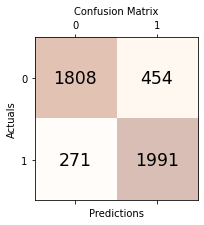

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2262
           1       0.81      0.88      0.85      2262

    accuracy                           0.84      4524
   macro avg       0.84      0.84      0.84      4524
weighted avg       0.84      0.84      0.84      4524


Accuracy: 83.97%
Precision: 81.43%
Recall: 88.02%


In [40]:
# predictors
X = X_res.to_numpy()
# target
Y = y_res.to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run DT with 10-fold cross validation
dt = tree.DecisionTreeClassifier(criterion="entropy",max_depth= 10, max_features= None, min_samples_leaf= 2,min_samples_split= 4)
y_pred = cross_val_predict(dt, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

**SMOTE FS**

In [41]:
X = dataset[selected_features]
y = dataset['class']

# Inisialisasi objek SMOTE
sm = SMOTE(random_state=42)

# Fit dan transform dataset dengan SMOTE
X_res1, y_res1 = sm.fit_resample(X, y)

X_res1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4524 entries, 0 to 4523
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mhsjk                     4524 non-null   int64  
 1   IPS1                      4524 non-null   float64
 2   IPS2                      4524 non-null   float64
 3   IPS3                      4524 non-null   float64
 4   IPS4                      4524 non-null   float64
 5   total_kredit_capai_smt4   4524 non-null   float64
 6   ipk                       4524 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 247.5 KB


**MODEL MENGGUNAKAN FS SETELAH OVERSAMPLING SMOTE**

In [36]:
# # find best value of SVM's hyperparameter

# from sklearn.model_selection import GridSearchCV
# from sklearn import svm

# # predictors
# X = X_res1.to_numpy()
# # target
# Y = y_res1.to_numpy()

# # define the range of hyperparameters to search over
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [0.1, 1, 10, 100],
#     'kernel': ['rbf']
# }

# # create a SVM classifier object
# svm_clf = svm.SVC()

# # perform grid search with cross-validation
# grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
# grid_search.fit(X, Y)

# # print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

Time: 5.9656 s



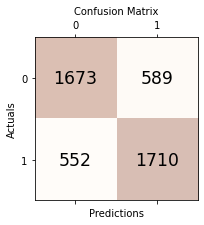

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      2262
           1       0.74      0.76      0.75      2262

    accuracy                           0.75      4524
   macro avg       0.75      0.75      0.75      4524
weighted avg       0.75      0.75      0.75      4524


Accuracy: 74.78%
Precision: 74.38%
Recall: 75.60%


In [42]:
# predictors
X = X_res1.to_numpy()
# target
Y = y_res1.to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
y_pred = cross_val_predict(svc, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

Time: 0.0291 s



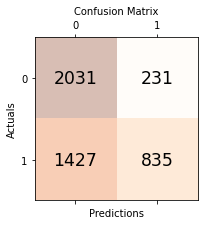

              precision    recall  f1-score   support

           0       0.59      0.90      0.71      2262
           1       0.78      0.37      0.50      2262

    accuracy                           0.63      4524
   macro avg       0.69      0.63      0.61      4524
weighted avg       0.69      0.63      0.61      4524


Accuracy: 63.35%
Precision: 78.33%
Recall: 36.91%


In [43]:
# predictors
X = X_res1.to_numpy()
# target
Y = y_res1.to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run Naive Bayes with 10-fold cross validation
gnb = GaussianNB(var_smoothing= 1e-09)
y_pred = cross_val_predict(gnb, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))

Time: 0.3288 s



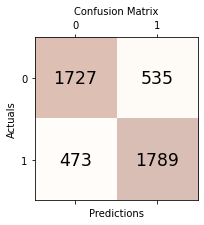

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      2262
           1       0.77      0.79      0.78      2262

    accuracy                           0.78      4524
   macro avg       0.78      0.78      0.78      4524
weighted avg       0.78      0.78      0.78      4524


Accuracy: 77.72%
Precision: 76.98%
Recall: 79.09%


In [44]:
# predictors
X = X_res1.to_numpy()
# target
Y = y_res1.to_numpy()

# get timing
t0 = time.time()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# run DT with 10-fold cross validation
dt = tree.DecisionTreeClassifier(criterion="entropy",max_depth= 10, max_features= None, min_samples_leaf= 2,min_samples_split= 4)
y_pred = cross_val_predict(dt, X, Y, cv=cv)

print("Time: %.4f s\n"%(time.time() - t0))
# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

# evaluate predictions using classification report
report = classification_report(Y, y_pred)
print(report)

print('\nAccuracy: %.2f%%' %(accuracy_score(Y, y_pred)*100))
print('Precision: %.2f%%' %(precision_score(Y, y_pred)*100))
print('Recall: %.2f%%' %(recall_score(Y, y_pred)*100))